In [75]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


# Import the Fashion MNIST dataset

In [82]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Returns 4 Numpy arrays. 
# Images: 28x28 NumPy arrays. Pixel values are 0-255 inclusive. 
# Labels: Array of integers from 0 to 9. These values map to the class of clothing the image represents. Mapping is below.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [83]:
print(f'Train_images Shape: {train_images.shape}')
print(f'Train_labels Length: {len(train_labels)}')
print(f'Train_labels Examples: {train_labels}')
print(f'Test_images Shape: {test_images.shape}')
print(f'Test_labels Length: {len(test_labels)}')

Train_images Shape: (60000, 28, 28)
Train_labels Length: 60000
Train_labels Examples: [9 0 0 ... 3 0 5]
Test_images Shape: (10000, 28, 28)
Test_labels Length: 10000


# Preprocess the data

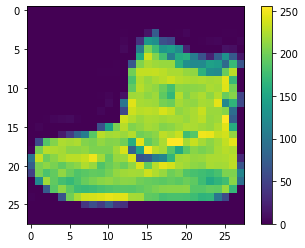

In [84]:
# Data needs to be preprocessed before training the network. 

plt.figure()
plt.imshow(train_images[0]) # Inspect the first image in the training set
plt.colorbar()
plt.grid(False)
plt.show()

# Here see that the pixel values are between 0 and 255.

In [85]:
# Scaling these values to a range of 0 to 1 before feeding them to the neural network model. 
# Remember to preprocess the training set and the testing in the same way.

train_images = train_images / 255.0
test_images = test_images / 255.0

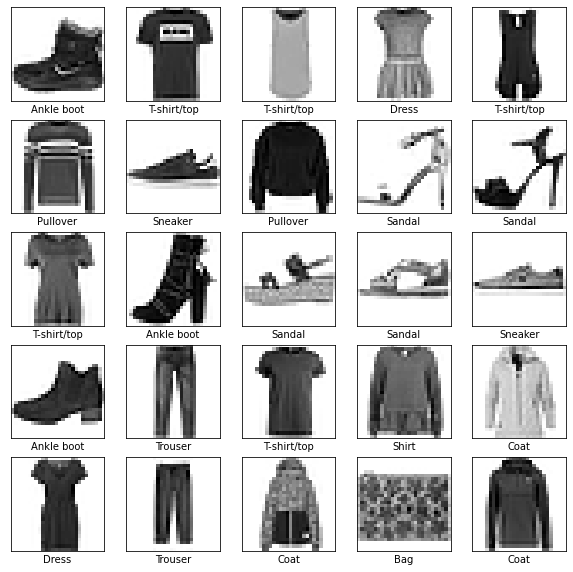

In [86]:
# Checking the data is in the correct format.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [100]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     # Transforms the images from a 2D array to a 1D array.
#     # It unstacks rows of pixels in the image and lines them up. 
#     # This layer has no parameters to learn. It only reformats the data.
#     keras.layers.Dense(units=1000, activation='relu'),
#     keras.layers.Dense(units=1000, activation='relu'),
#     keras.layers.Dense(units=500, activation='relu'),
#     keras.layers.Dense(units=200, activation='relu'),
#     keras.layers.Dense(10) # Returns a logits array with length of 10
# ])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
      # Transforms the images from a 2D array to a 1D array.
    # It unstacks rows of pixels in the image and lines them up. 
    # This layer has no parameters to learn. It only reformats the data.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)  # Returns a logits array with length of 10
])


In [101]:
# # Config the model with losses and metrics.
# # TIL: CategoricalCrossentropy and SparseCategoricalCrossentropy aren't interchangeable.

model.compile(optimizer='adam', # How the model is updated based on the data it sees and its loss function.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # measures how accurate the model is during training. Goal is to minimize this function.
              metrics=['accuracy']) # Used to monitor the training and testing steps

# Train the model.

In [102]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4959 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2443 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [103]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 

313/313 - 0s - loss: 0.3531 - accuracy: 0.8738


In [104]:
# Make predictions
# # Softmax layer converts the logits, the model's linear output, to probabilities, which are easier to interpret.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 
predictions = probability_model.predict(test_images)
print(f'The first prediction: {predictions[0]}')
# A prediction is an array of 10 numbers. It is the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. 
print(f'Label with the highest confidence value: {np.argmax(predictions[0])}')
print(f'The test label shows that this: {test_labels[0]}') 
# Classification was correct.

The first prediction: [7.6300887e-07 7.5847079e-11 3.9136717e-07 6.9301782e-12 5.3338610e-08
 6.8718463e-04 1.2448849e-06 6.3147596e-03 4.8220032e-09 9.9299556e-01]
Label with the highest confidence value: 9
The test label shows that this: 9


In [105]:
# Graph this to look at the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

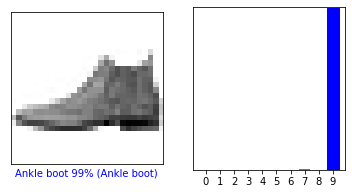

In [106]:
# Verify predictions
# Use the trained model to make predictions about an images.
# Here, we are looking at the 0th image, predictions, and prediction array. 
#Correct prediction labels are blue and incorrect prediction labels are red. 
#The number gives the percentage (out of 100) for the predicted label.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

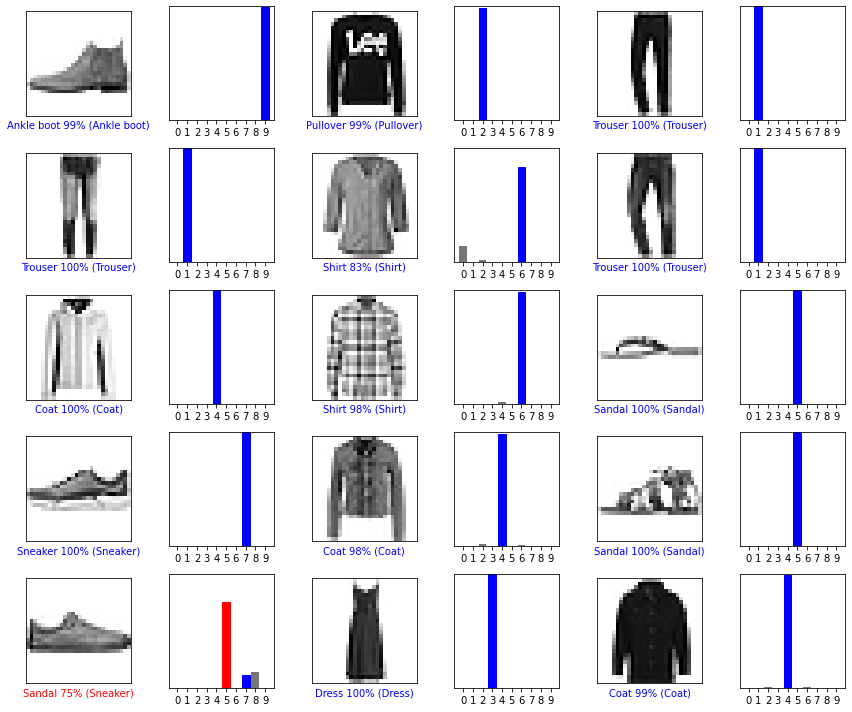

In [107]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Test_image shape before expand dims: (28, 28)
Test_image shape after expand dims: (1, 28, 28)
Test_image single prediction: [[1.3737002e-03 3.1018405e-16 9.8798007e-01 1.0814533e-08 2.8590576e-03
  4.8968614e-11 7.7871559e-03 1.9019471e-10 5.4923580e-11 1.6092174e-11]]
Test_image predicted label: 2


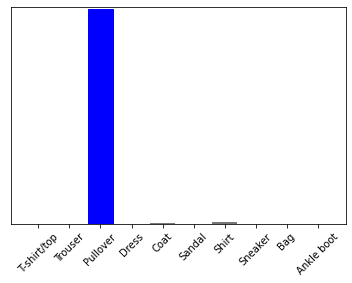

In [109]:
# Use the trained model on a single image
# Grab an image from the test dataset.
img = test_images[1]
print(f'Test_image shape before expand dims: {img.shape}')

# Add the image to a batch where it's the only member.
# TF Keras models are optimized to make predictions on a *batch*, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list:
img = (np.expand_dims(img,0))

print(f'Test_image shape after expand dims: {img.shape}')
predictions_single = probability_model.predict(img)
print(f'Test_image single prediction: {predictions_single}')

plot_value_array(1, predictions_single[0], test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)

predicted_label = np.argmax(predictions_single[0])
print(f'Test_image predicted label: {predicted_label}')
